# [Prody](http://prody.csb.pitt.edu) is an open-source Python package for protein structural dynamics analysis with expansive and well-written API.

In [1]:
import prody
prot = prody.parsePDB('3UB5')

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 3ub5 downloaded (3ub5.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 4055 atoms and 1 coordinate set(s) were parsed in 0.02s.


The default visualization in ProDy uses matplotlib.

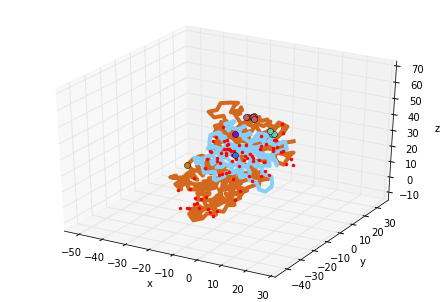

In [2]:
%matplotlib inline
prody.showProtein(prot)

With the latest version of ProDy, `py3Dmol` will be used if it has been imported.

In [3]:
prody.checkUpdates()

@> You are using the latest ProDy release (v1.8.2).


In [4]:
import py3Dmol
prody.showProtein(prot)

# Configuration

A number of keyword arguments are supported.

The background color is configurable.

In [5]:
prody.showProtein(prot,backgroundColor="black")

The height and width of the viewer can be changed.

In [6]:
prody.showProtein(prot, height=400, width=200,backgroundcolor='gray')

The viewer can be zoomed and centered on a given [AtomSelectionSpec](http://3dmol.csb.pitt.edu/doc/types.html#AtomSelectionSpec).

In [7]:
prody.showProtein(prot, zoomto={'resn':'ATP'})

# Styles

Custom styles can be applied by providing [AtomSelectionSpec](http://3dmol.csb.pitt.edu/doc/types.html#AtomSelectionSpec) and [AtomStyleSpec](http://3dmol.csb.pitt.edu/doc/types.html#AtomStyleSpec) objects.

A single style may be applied.

In [8]:
prody.showProtein(prot,style={'cartoon':{'colorscheme':'chain'},'stick':{'colorscheme':'chain'}})

For more complex styling, generate and manipulate the py3Dmol view object directly.

In [9]:
view = prody.view3D(prot)
view.setStyle({'cartoon':{'colorscheme':'chain'}})
view.setStyle({'hetflag':True},{'stick':{'colorscheme':'magentaCarbon'}})
view.setStyle({'bonds': 0},{'sphere':{'radius':0.5}})
view.addLabel('Chain A',{'inFront':True,'showBackground':False,'fontColor':'blue'},{'chain':'A'})
view.addLabel('Chain P',{'inFront':True,'showBackground':False,'fontColor':'green'},{'chain':'P'})

view.show()

# GNM/ANM

Squared fluctuations (or any other alpha-carbon length numerical vector) can be visualized in a RWB colorscheme.  Red values are larger.

In [10]:
gnm, sel = prody.calcGNM(prot)

@> Kirchhoff was built in 0.06s.
@> 20 modes were calculated in 0.08s.


In [11]:
prody.showProtein(prot,flucts=prody.calcSqFlucts(gnm))

Individual modes may be visualized.

In [12]:
prody.showProtein(prot,flucts=gnm[0].getArray())

Styles can still be applied.

In [13]:
prody.showProtein(prot,flucts=gnm[1].getArray(),style={'cartoon':{}})

# Motions

It is also possible to provide an array of vectors (one per a calpha) that can be used to animate motions.  The animate kwarg takes the 3Dmol.js animate options.

In [14]:
anm, sel = prody.calcANM(prot)

@> Hessian was built in 0.29s.
@> 20 modes were calculated in 1.34s.


In [15]:
prody.showProtein(prot,vecs=anm[0].getArray(),
                  flucts=prody.calcSqFlucts(anm[0]),
                  style={'cartoon':{}})